# Devoir Final

## Exercice 1

importation des packages nécessaires pour l'exercice

In [596]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Question 1

On définit notre fonction rho

In [597]:
def rho(alpha,x):
    if ( alpha == 0):
        return np.abs(x)
    else:
        if(np.abs(x) <= alpha) :
            return (( x ** 2 ) / 2)
        if (np.abs(x) > alpha) :
            return (alpha * np.abs(x) - (alpha ** 2) / 2)
print(rho(0.5,2))
def rho_alpha(alpha,xe):
    out = []
    for x in xe:
        out.append(rho(alpha,x))
    return out

0.875


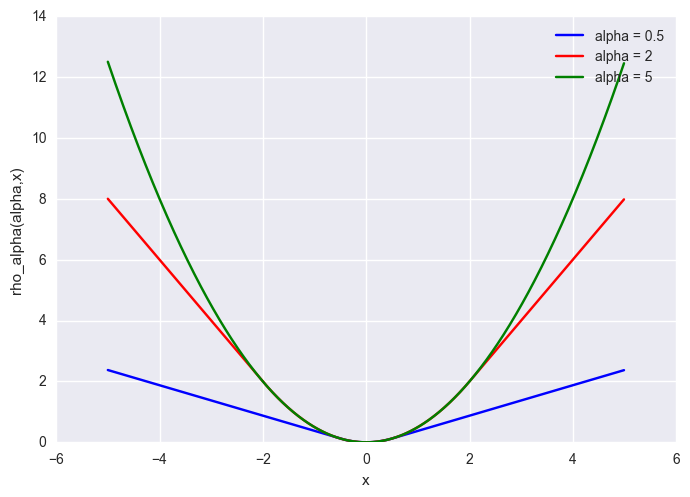

In [611]:
x = np.arange(-5,5,0.01)
plt.figure(1)
plt.plot(x, rho_alpha(0.5, x), color ='b', label = "alpha = 0.5")
plt.plot(x, rho_alpha(2, x), color ='r', label = "alpha = 2" )
plt.plot(x, rho_alpha(5, x), color ='g', label = "alpha = 5" )
plt.legend()
plt.xlabel("x")
plt.ylabel("rho_alpha(alpha,x)")

plt.show()

Plus $\alpha$ est grand, moins la courbe est évasée

### Question 2

In [599]:
theta0 = 1
theta = np.array([1,1])
n=100
d=2

X = np.random.uniform(0,1,(n,d))
epsilon = np.random.normal(0,1, n)

Y = theta0 + X.dot(theta) + epsilon.T
print(Y[0:10])

[ 0.73020531  3.02146892  2.54859015  2.68979681  2.93452293  0.01983706
  1.50739416  1.60723342  0.6476914   2.71694618]


### Question 3 : 

In [600]:
from scipy.optimize import minimize
alpha = 2

#On définit notre fonction qui renvoit un vecteur avec les theta
def minimizeThetaAlpha(alpha, Y): 
    def expr(theta):
        return(sum(rho_alpha(alpha, Y-theta[0]-X.dot(np.array([theta[1], theta[2]])))))
    
    init = [0,0,0]
    thetaMin = minimize(expr, init, method='nelder-mead',options={'xtol': 1e-5}) 
    return thetaMin.x

theta_hat= (minimizeThetaAlpha(2, Y))
print (theta_hat)


[ 1.23585436  0.47198068  1.15678102]


### Question 4 : 

In [601]:
#On crée un échantillon Bootstrap 
res_star = epsilon[np.random.randint(100,size=100)]
Y_star = theta0 + X.dot(theta) + res_star.T
theta_star = minimizeThetaAlpha(2,Y_star)

print(theta_star)


[ 1.23743131  0.32991829  1.35430918]


### Question 5

In [602]:
#Initialisation des variables nécessaires 
B = 200
bootstrapRes = np.zeros([B,100])
theta = np.array([1,1])
Ybootstrap = np.zeros([B,100])
thetaBoot = np.zeros([B,3])

#On crée nos échantillons bootstrap
for b in range(B): 
    bootstrapRes[b] = epsilon[np.random.randint(100,size=100)]
    Ybootstrap[b] = theta0 + X.dot(theta) + bootstrapRes[b].T
    thetaBoot[b]= minimizeThetaAlpha(2,Ybootstrap[b])

In [603]:
#Initialisation des variables nécessaires 
biais = np.zeros([3,1])
var = np.zeros([3,1])
tempo = np.zeros([3,1])

#Calcul du biais et de la variance
for i in range(3):
    biais[i] = np.mean(thetaBoot[:,i]-theta_hat[i])
    temp = thetaBoot[:,i] - thetaBoot[:,i].mean()
    var[i] = np.dot(temp/B, np.transpose(temp))

#Affichage
print("Biais : ")
print(biais)
print("variance :")
print(var)
print("risque quadratique")

#calcul du risque quadratique : 
elm1 = np.mean([np.linalg.norm(thetaBoot[b,:] - theta_hat, 2)**2 for b in range(B)])

print(elm1)

Biais : 
[[-0.210543  ]
 [ 0.5111526 ]
 [-0.11859255]]
variance :
[[ 0.0735467 ]
 [ 0.12776293]
 [ 0.11285883]]
risque quadratique
0.633837991429


### Question 6 : 

In [606]:
def eqm(x, y, alpha, B):
    t_star = np.zeros([3, B])
    theta_hat2 = minimizeThetaAlpha(alpha, y)
    # Vecteur des résidus
    r = y - theta_hat2[0] - X.dot(theta_hat2[1:])

    for b in range(B):
        r_star = r[np.random.randint(n, size=n)] # résidus bootstrapés
        y_star = r_star + theta_hat2[0] + X.dot(theta_hat2[1:])
        t_star[:, i] = minimizeThetaAlpha(alpha, y_star)
        
    return (np.mean([np.linalg.norm(t_star[:,b] - theta_hat2, 2)**2 for b in range(B)]))


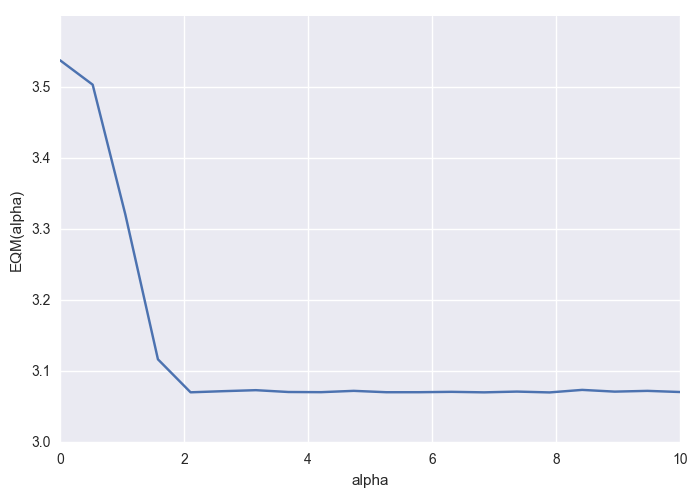

In [607]:
a_grid = np.linspace(0, 10, 20)
# Initialisation du vecteur des EQM(a)
eqm_val = np.zeros([20])

for i in range(20):
    eqm_val[i] = eqm(X, Y, a_grid[i], B=200)
plt.figure(2)
# On trace EQM pour plusieurs valeurs d'alpha
plt.plot(a_grid, eqm_val)
plt.xlabel("alpha")
plt.ylabel("EQM(alpha)")
plt.show()

### Question 7

In [608]:
# Paramètres du modèle
n, d = 100, 2
t0 = 1
t = np.array([1,1])

# On génère les vecteurs
x = np.random.rand(d, n)
e = np.random.standard_cauchy(n) # loi de Cauchy
y = np.dot(x.T, t) + e + t0

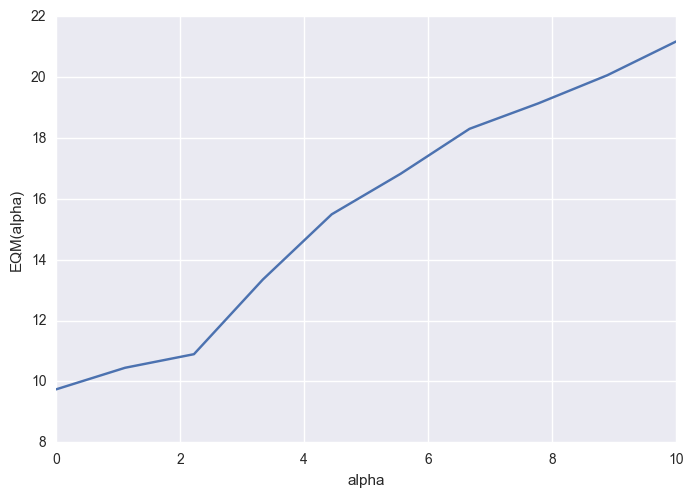

In [609]:
a_grid = np.linspace(0, 10, 10)

# Initialisation du vecteur des EQM(a)
eqm_val = np.zeros([10])

for i in range(10):
    eqm_val[i] = eqm(x, y, a_grid[i], B=50)

# On trace EQM pour plusieurs valeurs d'alpha
plt.figure(3)
plt.plot(a_grid, eqm_val)
plt.xlabel("alpha")
plt.ylabel("EQM(alpha)")
plt.show()

## Exercice 2

### Question 1 :

In [610]:
#On crée un vecteur alternant 1 et -1
def create_array(size):
    value = list()
    value.append(1)
    for i in range(1,size):
        if value[i-1]==1:
            value.append(-1)
        else:
            value.append(1)
    return value

nn = 100
pp = 100

#On crée une matrice à partir de ce vecteur
X1 = np.diag(create_array(nn))

Y1 = np.ones(nn)

lamb = 2

#on calcule theta 
theta_ridge = [Y1[i]*(-1)**(i) / (1+lamb) for i in range(nn)]

#on trouve la formule théorique pour vérifier notre résultat
true_formula = np.dot(np.dot(np.linalg.inv(np.dot(X1.T,X1)+lamb*np.identity(nn)),X1.T),y)

print("La vérification numérique est : %s" % np.isclose(theta_ridge,true_formula ).all())

La vérification numérique est : False


La formule est donnée par : 
$$ \theta = \frac{1}{\lambda +1} (-1)^{i+1} y_i \mathbb{1}n $$ 
pour i de 1 à n

### Question 2 : 

In [578]:
from sklearn.linear_model import Ridge

Y2 = np.arange(1,n+1)
lamb = 12
model_ridge = Ridge(alpha=lamb,fit_intercept=False)
model_ridge.fit(X1,Y2)

x_test = np.zeros(shape=(n,1))
x_test[1] = 1

y_predict = model_ridge.predict(x_test.T)
print("la prédiction de notre modèle : %s " % y_predict)

la prédiction de notre modèle : [-0.15384615] 


### Question 3 : 

On a $$\hat{\theta}^{rdgn}_{\lambda}(X,y) = \hat{\theta}^{rdg}_{\lambda N}(X,y)$$

Dans Sklearn c'est la version "classique", non normalisée, qui est codée.

### Question 4 : 

In [580]:
#génération des X et y 

from numpy.random import multivariate_normal
def ScenarioEquiCor(n_samples=10, n_features=50, sig_noise=0.1, rho=0.5, s=5, noise_type='Normal'):
    theta = np.zeros((n_features,))
    theta[0:s] = 10 * np.random.rand(s)
    covar = (1 - rho) * np.eye(n_features) + \
    rho * np.ones([n_features, n_features])
    X = multivariate_normal(np.zeros(n_features,), covar, [n_samples])
    y = AddNoise(np.dot(X, theta), sig_noise)
    return y, theta, X

def AddNoise(vect, sig_noise):
    n_samples = vect.shape[0]
    epsilon = sig_noise * np.random.randn(n_samples,)
    y = vect + epsilon
    return y

n_features = 100
n_samples = 30
n_samples_test = 50

rho = 0.9

sigma = 50
y, theta, X = ScenarioEquiCor(n_samples=n_samples, n_features=n_features, \
                              sig_noise=sigma, rho=rho, s=5)
ytest, _, Xtest = ScenarioEquiCor(n_samples=50, n_features=n_features,\
                                  sig_noise=sigma, rho=rho, s=5)



#### (a) Ridge1, sans normalisation : 

In [584]:
from sklearn.linear_model import RidgeCV
alpha_max = 1e4
eps = 1e-9

alphas_ridge = np.logspace(np.log10(alpha_max), np.log10(alpha_max * eps), num =100)
R1 = RidgeCV(alphas_ridge, fit_intercept=False, normalize=False, scoring=None, cv=2)
R1.fit(X, y) 
print("alpha trouvé : %s" %R1.alpha_)
print("R^2 = %s" %R1.score(Xtest,ytest))


alpha trouvé : 10000.0
R^2 = 0.03092578986


#### (b) Ridge2, normalisation  $\sqrt{n}$

In [587]:
#On crée une fonction qui permet de normaliser avec sqrt(n)
def normalizeX(val, X, Xtest):
    for i in range(n_features):
        norm = np.linalg.norm(X[:,i],2)
        X[:,i]= [val*x/norm for x in X[:,i]]
        Xtest[:,i]= [np.sqrt(n_samples_test)*x/norm for x in Xtest[:,i]]
    return(X, Xtest)

In [589]:
Xn1, Xtestn1 = normalizeX(np.sqrt(n_samples), X, Xtest)

R2 = RidgeCV(alphas_ridge, fit_intercept=False, normalize=False, scoring=None, cv=2)
R2.fit(Xn1, y) 
print("alpha trouvé : %s" %R2.alpha_)
print("R^2 = %s" %R2.score(Xtestn1,ytest))

alpha trouvé : 10000.0
R^2 = 0.0727551014994


#### (c) Ridge3, normalisation 1

In [590]:
from sklearn import preprocessing

Xn2 = preprocessing.normalize(X, norm='l2')
Xtestn2 = preprocessing.normalize(Xtest, norm='l2')

R3 = RidgeCV(alphas_ridge, fit_intercept=False, normalize=False, scoring=None, cv=2)
R3.fit(Xn2, y) 
print("alpha trouvé : %s" %R3.alpha_)
print("R^2 = %s" %R3.score(Xtestn2,ytest))

alpha trouvé : 10000.0
R^2 = -0.00659081298593


#### (d) Ridge4 n sans normalisation

In [591]:
R4 = Ridge(alpha=(R1.alpha_)*(n_samples), fit_intercept=False)
R4.fit(X, y) 
print("R^2 = %s" %R4.score(Xtest, ytest))

R^2 = -0.00340217851151


#### (e) Ridge2 n avec normalisation $\sqrt{n}$

In [592]:
R5 = Ridge(alpha=(R2.alpha_)*(n_samples), fit_intercept=False)
R5.fit(Xn1, y)
print("R^2 = %s" %R5.score(Xtestn1, ytest))

R^2 = -0.00340217851151


#### (f) Ridge3 n avec normalisation 1

In [593]:
R6 = Ridge(alpha=(R3.alpha_)*(n_samples), fit_intercept=False)
R6.fit(Xn2, y)
print("R^2 = %s" %R6.score(Xtestn2, ytest))

R^2 = -0.00701026623705
